###*Sayantan Mukherjee 60009220131 D2-2*

###*Below is My Mini-Project Implementation Using Yolov8n model*

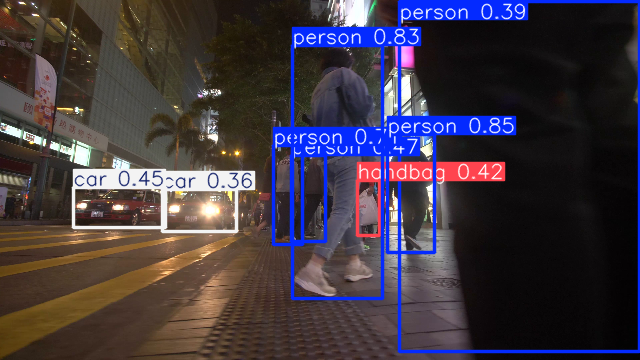

In [14]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image


model = YOLO('yolov8n.pt')
def process_video(video_path, max_frames=100, skip_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Skip frames to reduce load
        if frame_count % skip_frames != 0:
            continue

        frame = cv2.resize(frame, (640, 360))  # Resize to 640x360 for faster processing

        # Perform inference on the frame
        results = model(frame)

        # Visualize results on the frame
        annotated_frame = results[0].plot()

        #Frame converted from BGR in cv2 to RGB in PIL
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)

        # Clear previous output and display the frame
        clear_output(wait=True)
        display(pil_img)

    cap.release()

video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
process_video(video_path, max_frames=264, skip_frames=5)


In [16]:
import cv2
import os
import numpy as np
import time
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


model = YOLO('yolo11n.pt')
video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
output_frames_dir = 'mini-project frames'
output_video_path = 'Result.mp4'

# Create directory for processed frames
if not os.path.exists(output_frames_dir):
    os.makedirs(output_frames_dir)

# Open video file
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)  # Extract FPS from input video
frame_count = 0
frames = []
object_counts = []
inference_times = []

# Process video frame-by-frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Resize frame to 640x360 for efficiency
    frame = cv2.resize(frame, (640, 360))

    # Start inference time measurement
    start_time = time.time()
    results = model(frame)
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

    # Get annotated frame with bounding boxes
    annotated_frame = results[0].plot()

    # Count detected objects
    object_count = len(results[0].boxes)
    object_counts.append(object_count)

    # Save processed frame
    frame_filename = os.path.join(output_frames_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, annotated_frame)
    frames.append(annotated_frame)

    # Display progress
    if frame_count % 10 == 0:
        print(f"Processed {frame_count} frames...")

cap.release()
print("✅ All frames processed and saved!")




0: 384x640 14 persons, 9.5ms
Speed: 1.3ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 13.9ms
Speed: 1.7ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 skateboard, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 car, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 car, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 car, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 car, 13.6ms
Speed: 1.9ms preprocess, 13.6ms in


🔍 Performance Metrics:
⚡ Average Inference Time per Frame: 0.0258 sec
🚀 Estimated FPS: 38.75


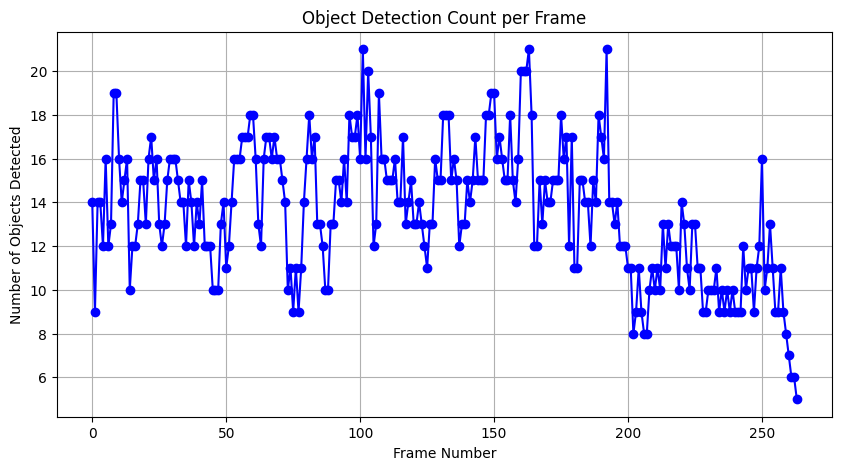

In [17]:
# --------------------------
#  Performance Analysis
# --------------------------
print("\n🔍 Performance Metrics:")

# Calculate FPS of inference
average_inference_time = sum(inference_times) / len(inference_times)
estimated_fps = 1 / average_inference_time
print(f"⚡ Average Inference Time per Frame: {average_inference_time:.4f} sec")
print(f"🚀 Estimated FPS: {estimated_fps:.2f}")

# Plot Object Detection Trends
plt.figure(figsize=(10, 5))
plt.plot(range(len(object_counts)), object_counts, marker='o', linestyle='-', color='b')
plt.xlabel("Frame Number")
plt.ylabel("Number of Objects Detected")
plt.title("Object Detection Count per Frame")
plt.grid()
plt.show()

###*This time i tried to apply new classification model of yolo as yolo11n to see if there is any improvement on classification performance*

*I saw a clear cut improvement on object detection as the earlier model wasn't able to detect and classify the traffic signal on the last frame(instance) which yolo11 does pefectly.*

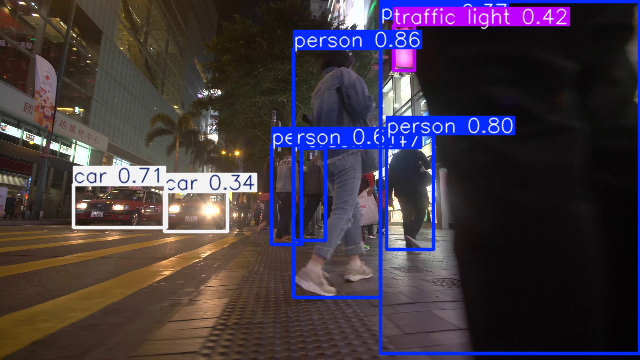

In [6]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image


model = YOLO('yolo11n.pt')
def process_video(video_path, max_frames=100, skip_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Skip frames to reduce load
        if frame_count % skip_frames != 0:
            continue

        frame = cv2.resize(frame, (640, 360))  # Resize to 640x360 for faster processing

        # Perform inference on the frame
        results = model(frame)

        # Visualize results on the frame
        annotated_frame = results[0].plot()

        #Frame converted from BGR in cv2 to RGB in PIL
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)

        # Clear previous output and display the frame
        clear_output(wait=True)
        display(pil_img)

    cap.release()

video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
process_video(video_path, max_frames=264, skip_frames=5)


In [7]:
import cv2
import os
import numpy as np
import time
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


model = YOLO('yolo11n.pt')
video_path = '/content/8051_pedestrians_pedestrian_foot_traffic_18030109AKowloStreets33.mp4'
output_frames_dir = 'detected_frames'
output_video_path = 'Result.mp4'

# Create directory for processed frames
if not os.path.exists(output_frames_dir):
    os.makedirs(output_frames_dir)

# Open video file
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)  # Extract FPS from input video
frame_count = 0
frames = []
object_counts = []
inference_times = []

# Process video frame-by-frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Resize frame to 640x360 for efficiency
    frame = cv2.resize(frame, (640, 360))

    # Start inference time measurement
    start_time = time.time()
    results = model(frame)
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

    # Get annotated frame with bounding boxes
    annotated_frame = results[0].plot()

    # Count detected objects
    object_count = len(results[0].boxes)
    object_counts.append(object_count)

    # Save processed frame
    frame_filename = os.path.join(output_frames_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, annotated_frame)
    frames.append(annotated_frame)

    # Display progress
    if frame_count % 10 == 0:
        print(f"Processed {frame_count} frames...")

cap.release()
print("✅ All frames processed and saved!")




0: 384x640 14 persons, 8.8ms
Speed: 1.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 27.3ms
Speed: 1.9ms preprocess, 27.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 skateboard, 17.7ms
Speed: 3.7ms preprocess, 17.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 car, 32.4ms
Speed: 3.9ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 car, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 car, 14.1ms
Speed: 2.1ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 car, 13.6ms
Speed: 2.1ms preprocess, 13.6ms in


🔍 Performance Metrics:
⚡ Average Inference Time per Frame: 0.0224 sec
🚀 Estimated FPS: 44.66


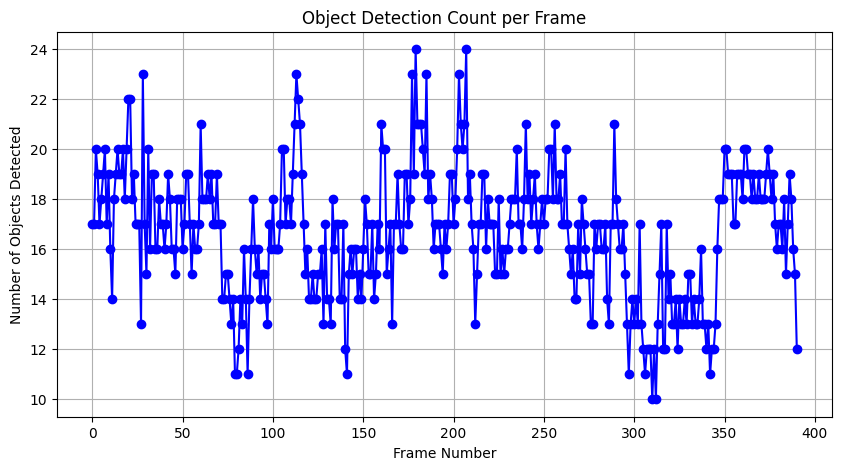

In [13]:
# --------------------------
#  Performance Analysis
# --------------------------
print("\n🔍 Performance Metrics:")

# Calculate FPS of inference
average_inference_time = sum(inference_times) / len(inference_times)
estimated_fps = 1 / average_inference_time
print(f"⚡ Average Inference Time per Frame: {average_inference_time:.4f} sec")
print(f"🚀 Estimated FPS: {estimated_fps:.2f}")

# Plot Object Detection Trends
plt.figure(figsize=(10, 5))
plt.plot(range(len(object_counts)), object_counts, marker='o', linestyle='-', color='b')
plt.xlabel("Frame Number")
plt.ylabel("Number of Objects Detected")
plt.title("Object Detection Count per Frame")
plt.grid()
plt.show()

###*Clear Improvement in the Model Performance of Inference Time Per Frame and Fps from the earlier model of yolov8*

###*Web Cam*

###*This is a Real-time web cam of a Street Crossing at Bangkok, Thailand City.*

*I captured and stored a small part of 15s of the Street View of 4th March 2025 at 17:23 +7 GMT*

In [9]:
import cv2

video_path = '/content/video.mov'

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total frame count

print(f"Total number of frames in the video: {frame_count}")

cap.release()


Total number of frames in the video: 391


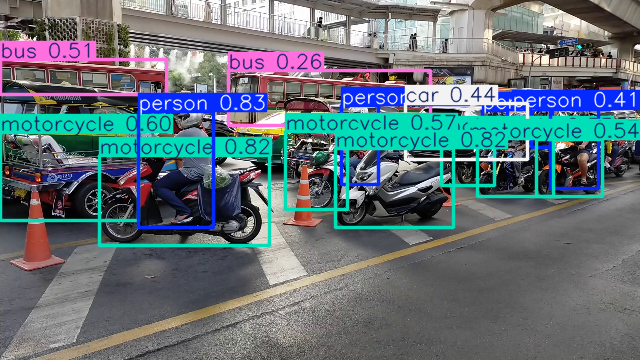

In [10]:
model = YOLO('yolo11n.pt')
def process_video(video_path, max_frames=100, skip_frames=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        # Skip frames to reduce load
        if frame_count % skip_frames != 0:
            continue

        frame = cv2.resize(frame, (640, 360))  # Resize to 640x360 for faster processing

        # Perform inference on the frame
        results = model(frame)

        # Visualize results on the frame
        annotated_frame = results[0].plot()

        #Frame converted from BGR in cv2 to RGB in PIL
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)

        # Clear previous output and display the frame
        clear_output(wait=True)
        display(pil_img)

    cap.release()

video_path = '/content/video.mov'
process_video(video_path, max_frames=391, skip_frames=5)


In [11]:
model = YOLO('yolo11n.pt')

video_path = '/content/video.mov'
output_frames_dir = 'web_cam Frames'
output_video_path = 'Cam_Detection_Result.mp4'

# Create directory for processed frames
if not os.path.exists(output_frames_dir):
    os.makedirs(output_frames_dir)

# Open video file
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)  # Extract FPS from input video
frame_count = 0
frames = []
object_counts = []
inference_times = []

# Process video frame-by-frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Resize frame to 640x360 for efficiency
    frame = cv2.resize(frame, (640, 360))

    # Start inference time measurement
    start_time = time.time()
    results = model(frame)
    inference_time = time.time() - start_time
    inference_times.append(inference_time)

    # Get annotated frame with bounding boxes
    annotated_frame = results[0].plot()

    # Count detected objects
    object_count = len(results[0].boxes)
    object_counts.append(object_count)

    # Save processed frame
    frame_filename = os.path.join(output_frames_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, annotated_frame)
    frames.append(annotated_frame)

    # Display progress
    if frame_count % 10 == 0:
        print(f"Processed {frame_count} frames...")

cap.release()
print("✅ All frames processed and saved!")

frame_files = sorted(os.listdir(output_frames_dir))  # Sort frames in order
frame_path = os.path.join(output_frames_dir, frame_files[0])  # Get first frame
frame_example = cv2.imread(frame_path)
height, width, layers = frame_example.shape

# Define video writer with extracted FPS
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # MP4 codec
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Write each frame to video
for frame_file in tqdm(frame_files, desc="📽️ Creating video"):
    frame_path = os.path.join(output_frames_dir, frame_file)
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

video_writer.release()
print(f"✅ Final video saved as: {output_video_path} with {fps} FPS")



0: 384x640 6 persons, 5 cars, 4 motorcycles, 2 buss, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 5 cars, 4 motorcycles, 2 buss, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 5 cars, 5 motorcycles, 3 buss, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 5 cars, 6 motorcycles, 2 buss, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 4 cars, 6 motorcycles, 2 buss, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 3 cars, 7 motorcycles, 1 bus, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 3 cars, 6 motorcycles, 2 buss, 1

📽️ Creating video: 100%|██████████| 391/391 [00:02<00:00, 161.82it/s]

✅ Final video saved as: Cam_Detection_Result.mp4 with 25.0 FPS


⚡ Average Inference Time per Frame: 0.0224 sec
🚀 Estimated FPS: 44.66


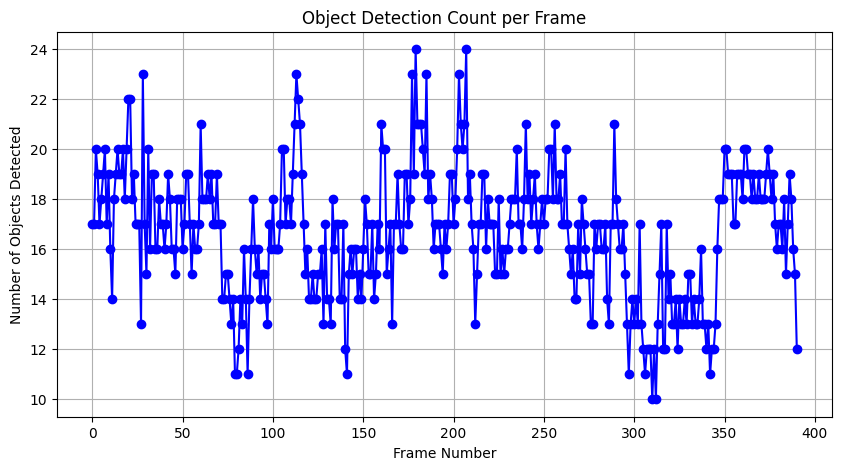

In [12]:
average_inference_time = sum(inference_times) / len(inference_times)
estimated_fps = 1 / average_inference_time
print(f"⚡ Average Inference Time per Frame: {average_inference_time:.4f} sec")
print(f"🚀 Estimated FPS: {estimated_fps:.2f}")

# Plot Object Detection Trends
plt.figure(figsize=(10, 5))
plt.plot(range(len(object_counts)), object_counts, marker='o', linestyle='-', color='b')
plt.xlabel("Frame Number")
plt.ylabel("Number of Objects Detected")
plt.title("Object Detection Count per Frame")
plt.grid()
plt.show()

###*Summary*

*The goal of this experiment was to perform real-time object detection on a video using the YOLOv11 model.
I applied object detection frame-by-frame, visualized results, and analyzed performance metrics.*

Key Observations:

📌 YOLOv11 efficiently detected multiple objects per frame in real-time.

📌 The inference time per frame was recorded and analyzed to estimate detection speed.

📌 Object count analysis showed fluctuations in detection trends across frames.

📌 The final output video successfully retained the same playback speed as the original input.

Conclusion:

✅ The experiment demonstrated real-time object detection on video footage.

✅ Performance analysis helped in understanding detection efficiency & speed.

✅ The approach is applicable to traffic monitoring, surveillance, and crowd analysis.

✅ The framework can be extended for more complex AI-driven video analytics. 🚀


